In [1]:
import numpy as np
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

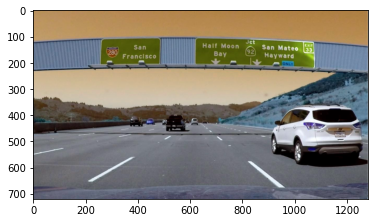

In [6]:
img = cv2.imread('signs_vehicles_xygrad.png')
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

(720, 1280)


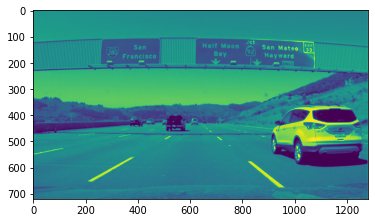

In [7]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gray.shape)
plt.imshow(gray)

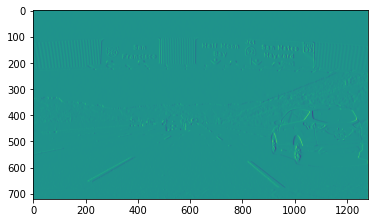

In [8]:
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
plt.imshow(sobel_x)

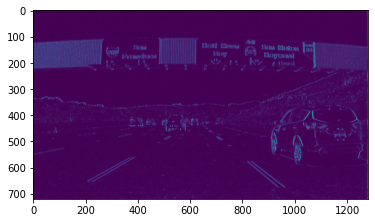

In [9]:
abs_sx = np.absolute(sobel_x)
plt.imshow(abs_sx)

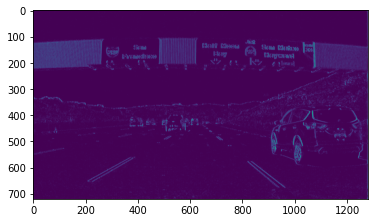

In [10]:
scaled_x = np.uint8(255*abs_sx/np.max(abs_sx))
plt.imshow(scaled_x)

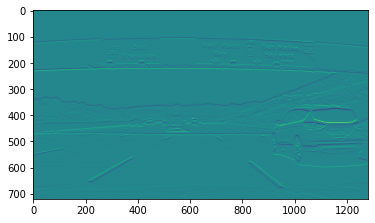

In [11]:
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
plt.imshow(sobel_y)

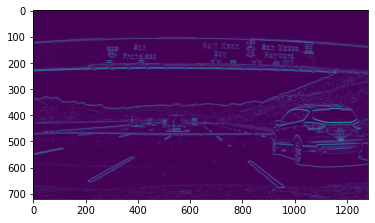

In [12]:
abs_sy = np.absolute(sobel_y)
plt.imshow(abs_sy)

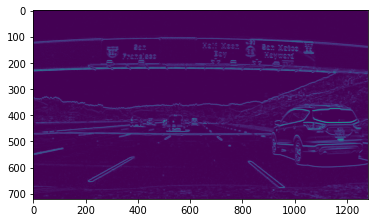

In [13]:
scaled_y = np.uint8(255*abs_sy/np.max(abs_sy))
plt.imshow(scaled_y)

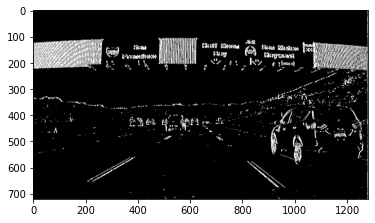

In [14]:
th_min = 20
th_max = 80
sx_binary = np.zeros_like(gray)
sx_binary[(scaled_x >= th_min)&(scaled_y <= th_max)] = 1
plt.imshow(sx_binary, cmap='gray')

## 现在设置一个soble函数

In [15]:
import numpy as np
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

### Sobel算子实现

In [16]:
def abs_sobel_thresh(img, orient='x', sobel_kernel=3,thresh=(20,100)):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    if orient=='x':
        sobel_ = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize = sobel_kernel)
    else:
        sobel_ = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize = sobel_kernel)
    abs_so = np.absolute(sobel_)
    scaled_so = np.uint8(255*abs_so/np.max(abs_so))
    result = np.zeros_like(scaled_so)
    result[(scaled_so>=thresh[0])&(scaled_so<=thresh[1])] = 1
    return result
    

### 梯度向量

In [17]:
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0,255)):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize = sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize = sobel_kernel)
    
    gradmag = np.sqrt( sobelx**2 + sobely**2)
    scale_factor = np.max(gradmag)/255
    gradmag = (gradmag/scale_factor).astype(np.uint8)
    
    binary_output = np.zeros_like(gradmag)
    binary_output[(gradmag>=mag_thresh[0])&(gradmag<=mag_thresh[1])] = 1
    
    return binary_output

### 用梯度方向过度梯度向量

In [18]:
def dir_thresh(img, sobel_kernel=3, dir_thresh=(0, np.pi/2)):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize = sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize = sobel_kernel)
    
    absgraddir = np.arctan2(np.absolute(sobely),np.absolute(sobelx))
    
    binary_output = np.zeros_like(absgraddir)
    binary_output[(absgraddir>=dir_thresh[0]) & (absgraddir<=dir_thresh[1])] = 1
    
    return binary_output

(720, 1280, 3)


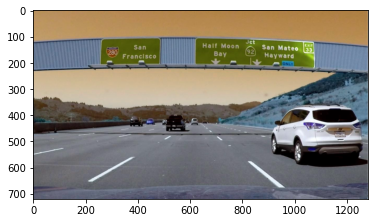

In [19]:
img_test = cv2.imread('signs_vehicles_xygrad.png')
print(img_test.shape)
plt.imshow(img_test)

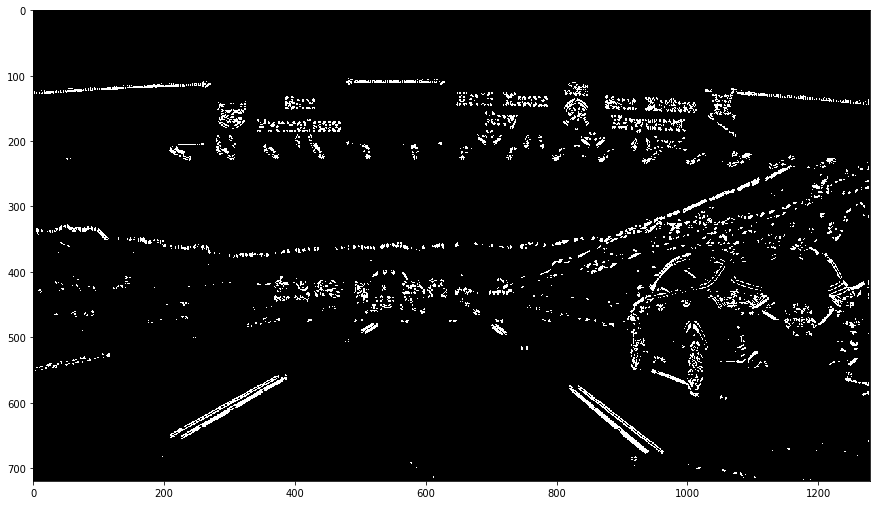

In [68]:
ker_size = 9
gradx = abs_sobel_thresh(img_test, orient='x',sobel_kernel=ker_size, thresh=(20,100) )
grady = abs_sobel_thresh(img_test, orient='y', sobel_kernel=ker_size, thresh=(20,100))

mag_bin = mag_thresh(img_test, sobel_kernel=ker_size, mag_thresh=(30,100))
dir_bin = dir_thresh(img_test, sobel_kernel=ker_size, dir_thresh=(0.7,1.3))

combined = np.zeros_like(dir_bin)
combined[((gradx==1) & (grady==1)) | ((mag_bin==1)&(dir_bin==1))] = 1
plt.figure(figsize=(15,10))
plt.imshow(combined,cmap='gray')